In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.gridspec import GridSpec

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv


In [42]:
df2015=pd.read_csv("/kaggle/input/world-happiness/2015.csv").rename(columns={'Happiness Rank': 'Happiness Rank 2015','Happiness Score': 'Happiness Score 2015'})
df2016=pd.read_csv("/kaggle/input/world-happiness/2016.csv").rename(columns={'Happiness Rank': 'Happiness Rank 2016','Happiness Score': 'Happiness Score 2016'})
df2017=pd.read_csv("/kaggle/input/world-happiness/2017.csv").rename(columns={'Whisker.high':'Upper Confidence Interval','Whisker.low':'Lower Confidence Interval', 'Happiness.Rank': 'Happiness Rank 2017','Happiness.Score': 'Happiness Score 2017'})
df2018=pd.read_csv("/kaggle/input/world-happiness/2018.csv").rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank 2018','Score': 'Happiness Score 2018'})
df2019=pd.read_csv("/kaggle/input/world-happiness/2019.csv").rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank 2019','Score': 'Happiness Score 2019'})
df2017.head()

,Country,Happiness Rank 2017,Happiness Score 2017,Upper Confidence Interval,Lower Confidence Interval,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
df2015.groupby('Region').size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [47]:
df2015.Country=df2015.Country.replace({'Somaliland region': 'Somaliland Region'})

df2017.Country=df2017.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan'})
df2017=pd.merge(df2017, df2016[['Country', 'Region']], how='left', on='Country')
df2017.loc[[112, 138, 154], 'Region']='Sub-Saharan Africa'

df2018.Country=df2018.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan', 'Trinidad & Tobago': 'Trinidad and Tobago'})
df2018=pd.merge(df2018, df2016[['Country', 'Region']], how='left', on='Country')
df2018.loc[[122, 140, 154], 'Region']='Sub-Saharan Africa'
df2018.loc[37, 'Region']='Latin America and Caribbean'
df2018.loc[57, 'Region']='Western Europe'

df2019.Country=df2019.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan', 'Trinidad & Tobago': 'Trinidad and Tobago'})
df2019=pd.merge(df2019, df2016[['Country', 'Region']], how='left', on='Country')
df2019.loc[[119, 122, 134, 143, 154], 'Region']='Sub-Saharan Africa'
df2019.loc[38, 'Region']='Latin America and Caribbean'
df2019.loc[63, 'Region']='Western Europe'
df2019.loc[83, 'Region']='Central and Eastern Europe'

In [33]:
df2016.head()

,Country,Region,Happiness Rank 2016,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
byregion_2015=df2015.groupby('Region').mean()['Happiness Score 2015'].reset_index().sort_values(by='Region', ascending=True)
byregion_2016=df2016.groupby('Region').mean()['Happiness Score 2016'].reset_index().sort_values(by='Region', ascending=True)
byregion_2017=df2017.groupby('Region').mean()['Happiness Score 2017'].reset_index().sort_values(by='Region', ascending=True)
byregion_2018=df2018.groupby('Region').mean()['Happiness Score 2018'].reset_index().sort_values(by='Region', ascending=True)
byregion_2019=df2019.groupby('Region').mean()['Happiness Score 2019'].reset_index().sort_values(by='Region', ascending=True)

byregion_overall=pd.concat([byregion_2015, byregion_2016['Happiness Score 2016'], byregion_2017['Happiness Score 2017'], byregion_2018['Happiness Score 2018'], byregion_2019['Happiness Score 2019']], axis=1)
byregion_overall.head()

,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500
1,Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517
2,Eastern Asia,5.626167,5.624167,5.646667,5.672000,5.688833
3,Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429
4,Middle East and Northern Africa,5.406900,5.386053,5.369684,5.282737,5.237000


In [6]:
byregion_overall=byregion_overall.T
byregion_overall.columns=byregion_overall.iloc[0]
byregion_overall=byregion_overall.reset_index()
byregion_overall.drop(0, inplace=True)

byregion_overall['index']=[2015,2016,2017,2018,2019]
byregion_overall['index']=pd.to_datetime(byregion_overall['index'], format='%Y')
byregion_overall

Region,index,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
1,2015-01-01,7.285,5.33293,5.62617,6.14468,5.4069,7.273,5.31744,4.58086,4.2028,6.68962
2,2016-01-01,7.3235,5.37069,5.62417,6.10175,5.38605,7.254,5.33889,4.56329,4.13642,6.68567
3,2017-01-01,7.299,5.40993,5.64667,5.95782,5.36968,7.1545,5.44488,4.62843,4.11195,6.70371
4,2018-01-01,7.298,5.46397,5.672,5.95014,5.28274,7.107,5.31344,4.60386,4.19503,6.78176
5,2019-01-01,7.2675,5.56152,5.68883,5.95443,5.237,7.085,5.27367,4.52686,4.30005,6.84219


In [48]:
bycountry_2015=df2015[['Country', 'Region', 'Happiness Score 2015', 'Standard Error']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2016=df2016[['Country', 'Region', 'Happiness Score 2016', 'Lower Confidence Interval', 'Upper Confidence Interval']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2017=df2017[['Country', 'Region', 'Happiness Score 2017', 'Lower Confidence Interval', 'Upper Confidence Interval']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2018=df2018[['Country', 'Region', 'Happiness Score 2018']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2019=df2019[['Country', 'Region', 'Happiness Score 2019']].sort_values(by=['Region', 'Country'], ascending=True)

In [49]:
bycountry_2017

,Country,Region,Happiness Score 2017,Lower Confidence Interval,Upper Confidence Interval
9,Australia,Australia and New Zealand,7.284,7.211349,7.356651
7,New Zealand,Australia and New Zealand,7.314,7.248490,7.379510
108,Albania,Central and Eastern Europe,4.644,4.535536,4.752464
120,Armenia,Central and Eastern Europe,4.376,4.285265,4.466735
84,Azerbaijan,Central and Eastern Europe,5.234,5.168714,5.299287
...,...,...,...,...,...
88,Portugal,Western Europe,5.195,5.104959,5.285042
33,Spain,Western Europe,6.403,6.334945,6.471055
8,Sweden,Western Europe,7.284,7.223905,7.344095
3,Switzerland,Western Europe,7.494,7.426227,7.561772


In [52]:
from functools import reduce
dfs=[bycountry_2015, bycountry_2016, bycountry_2017, bycountry_2018, bycountry_2019]
bycountry_overall=reduce( lambda left, right: pd.merge(left, right, how='outer', on=['Country', 'Region']), dfs )
bycountry_overall['Overall Mean Score']=bycountry_overall.mean(axis=1)
bycountry_overall=bycountry_overall.rename(columns={'Standard Error':'Standard_Error2015', 'Lower Confidence Interval_x': 'LCI2016','Upper Confidence Interval_x': 'UCI2016','Lower Confidence Interval_y': 'LCI2017','Upper Confidence Interval_y': 'UCI2017'})
bycountry_overall

,Country,Region,Happiness Score 2015,Standard_Error2015,Happiness Score 2016,LCI2016,UCI2016,Happiness Score 2017,LCI2017,UCI2017,Happiness Score 2018,Happiness Score 2019,Overall Mean Score
0,Australia,Australia and New Zealand,7.284,0.04083,7.313,7.241,7.385,7.284,7.211349,7.356651,7.272,7.228,6.561583
1,New Zealand,Australia and New Zealand,7.286,0.03371,7.334,7.264,7.404,7.314,7.248490,7.379510,7.324,7.307,6.589471
2,Albania,Central and Eastern Europe,4.959,0.05013,4.655,4.546,4.764,4.644,4.535536,4.752464,4.586,4.719,4.221113
3,Armenia,Central and Eastern Europe,4.350,0.04763,4.360,4.266,4.454,4.376,4.285265,4.466735,4.321,4.559,3.948563
4,Azerbaijan,Central and Eastern Europe,5.212,0.03363,5.291,5.226,5.356,5.234,5.168714,5.299287,5.201,5.208,4.722963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Somalia,Sub-Saharan Africa,NaN,NaN,5.440,5.321,5.559,5.151,5.059516,5.242484,4.982,4.668,5.177875
162,South Sudan,Sub-Saharan Africa,NaN,NaN,3.832,3.596,4.068,3.591,3.456462,3.725539,3.254,2.853,3.547000
163,Northern Cyprus,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.835,5.718,5.776500
164,North Macedonia,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.274,5.274000


In [54]:
bycountry_middleeast=bycountry_overall.query(' Region=="Middle East and Northern Africa" ').T
bycountry_middleeast.columns=bycountry_middleeast.loc['Country']
bycountry_middleeast.drop(['Country', 'Region'], inplace=True)
bycountry_middleeast=bycountry_middleeast.reset_index()
bycountry_middleeast

Country,index,Algeria,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,...,Morocco,Oman,Palestinian Territories,Qatar,Saudi Arabia,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
0,Happiness Score 2015,5.605,5.96,4.194,4.686,4.677,7.278,5.192,6.295,4.839,...,5.013,6.853,4.715,6.611,6.411,3.006,4.739,5.332,6.901,4.077
1,Standard_Error2015,0.05099,0.05412,0.0326,0.04449,0.05232,0.0347,0.04524,0.04456,0.04337,...,0.0342,0.05335,0.04394,0.06257,0.04633,0.05015,0.03589,0.03864,0.03729,0.04367
2,Happiness Score 2016,6.355,6.218,4.362,4.813,4.575,7.267,5.303,6.239,5.129,...,5.151,NaN,4.754,6.375,6.379,3.069,5.045,5.389,6.573,3.724
3,LCI2016,6.227,6.128,4.259,4.703,4.446,7.199,5.187,6.154,5.031,...,5.058,NaN,4.649,6.178,6.287,2.936,4.965,5.295,6.494,3.621
4,UCI2016,6.483,6.308,4.465,4.923,4.704,7.335,5.419,6.324,5.227,...,5.244,NaN,4.859,6.572,6.471,3.202,5.125,5.483,6.652,3.827
5,Happiness Score 2017,5.872,6.087,4.735,4.692,4.497,7.213,5.336,6.105,5.225,...,5.235,NaN,4.775,6.375,6.344,3.462,4.805,5.5,6.648,3.593
6,LCI2017,5.76571,5.99501,4.64487,4.58578,4.37141,7.14615,5.22359,6.01804,5.13112,...,5.15166,NaN,4.66815,6.18152,6.24383,3.26033,4.72563,5.40514,6.57395,3.49325
7,UCI2017,5.97829,6.17899,4.82513,4.79822,4.62259,7.27985,5.44841,6.19196,5.31888,...,5.31834,NaN,4.88185,6.56848,6.44417,3.66367,4.88437,5.59486,6.72205,3.69275
8,Happiness Score 2018,5.295,6.105,4.419,4.707,4.456,6.814,5.161,6.083,5.358,...,5.254,NaN,4.743,6.374,6.371,3.462,4.592,5.483,6.774,3.355
9,Happiness Score 2019,5.211,6.199,4.166,4.548,4.437,7.139,4.906,6.021,5.197,...,5.208,NaN,4.696,6.374,6.375,3.462,4.461,5.373,6.825,3.38


In [75]:
bycountry_middleeast.drop('Oman', axis=1, inplace=True)
bycountry_middleeast

Country,index,Algeria,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Libya,Morocco,Palestinian Territories,Qatar,Saudi Arabia,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
0,Happiness Score 2015,5.605,5.96,4.194,4.686,4.677,7.278,5.192,6.295,4.839,5.754,5.013,4.715,6.611,6.411,3.006,4.739,5.332,6.901,4.077
1,Standard_Error2015,0.05099,0.05412,0.0326,0.04449,0.05232,0.0347,0.04524,0.04456,0.04337,0.07832,0.0342,0.04394,0.06257,0.04633,0.05015,0.03589,0.03864,0.03729,0.04367
2,Happiness Score 2016,6.355,6.218,4.362,4.813,4.575,7.267,5.303,6.239,5.129,5.615,5.151,4.754,6.375,6.379,3.069,5.045,5.389,6.573,3.724
3,LCI2016,6.227,6.128,4.259,4.703,4.446,7.199,5.187,6.154,5.031,5.406,5.058,4.649,6.178,6.287,2.936,4.965,5.295,6.494,3.621
4,UCI2016,6.483,6.308,4.465,4.923,4.704,7.335,5.419,6.324,5.227,5.824,5.244,4.859,6.572,6.471,3.202,5.125,5.483,6.652,3.827
5,Happiness Score 2017,5.872,6.087,4.735,4.692,4.497,7.213,5.336,6.105,5.225,5.525,5.235,4.775,6.375,6.344,3.462,4.805,5.5,6.648,3.593
6,LCI2017,5.76571,5.99501,4.64487,4.58578,4.37141,7.14615,5.22359,6.01804,5.13112,5.37305,5.15166,4.66815,6.18152,6.24383,3.26033,4.72563,5.40514,6.57395,3.49325
7,UCI2017,5.97829,6.17899,4.82513,4.79822,4.62259,7.27985,5.44841,6.19196,5.31888,5.67695,5.31834,4.88185,6.56848,6.44417,3.66367,4.88437,5.59486,6.72205,3.69275
8,Happiness Score 2018,5.295,6.105,4.419,4.707,4.456,6.814,5.161,6.083,5.358,5.566,5.254,4.743,6.374,6.371,3.462,4.592,5.483,6.774,3.355
9,Happiness Score 2019,5.211,6.199,4.166,4.548,4.437,7.139,4.906,6.021,5.197,5.525,5.208,4.696,6.374,6.375,3.462,4.461,5.373,6.825,3.38


[None, None]

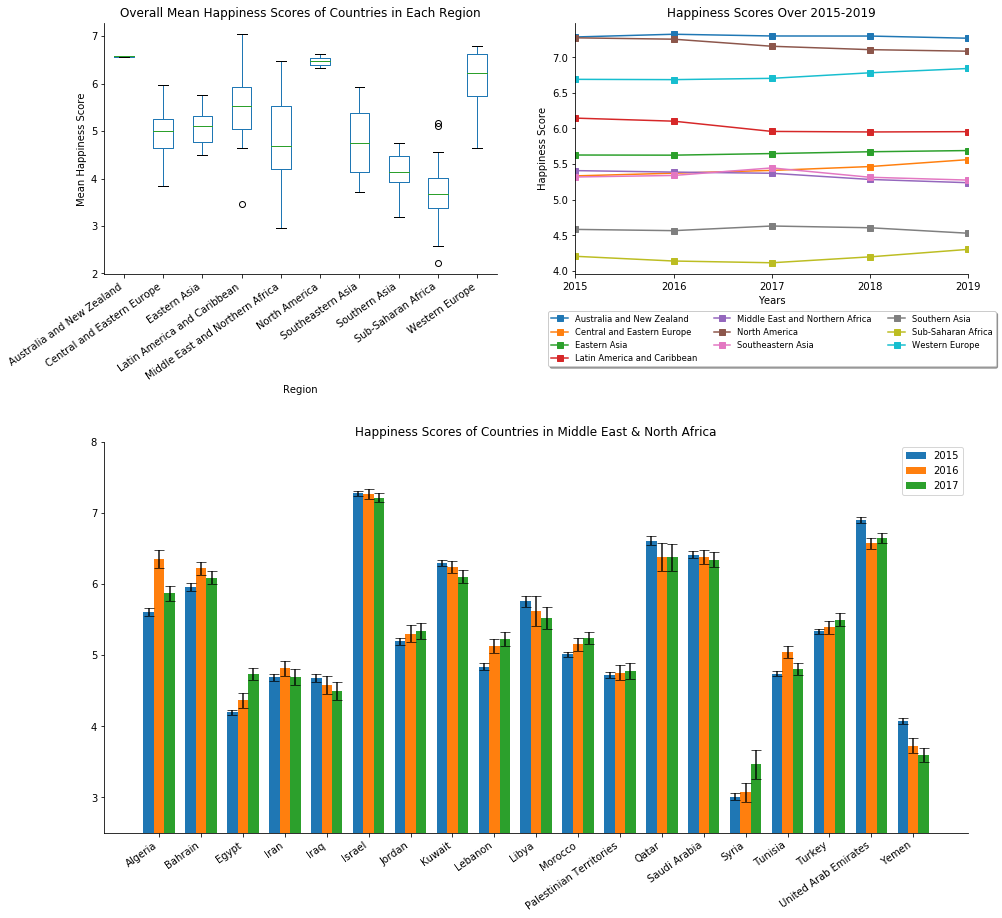

In [134]:
#PLOTTING
#2ST PLOT: how happiness score changes over time for regions?
#1nd: boxplot for each region 
#3nd: compare Switzerland (ranked 1st in 2015) and Togo (ranked last in 2015) in barplot 

fig=plt.figure(figsize=[15,15])
gs = GridSpec(6,2, figure=fig, hspace=0.25, wspace=0.2)

ax1 = fig.add_subplot(gs[0:2,0])
bycountry_overall.boxplot(column='Overall Mean Score', by='Region', ax=ax1)

labels=ax1.get_xticklabels()
ax1.set_xticklabels(labels, rotation=35, ha='right')

ax1.set_title('Overall Mean Happiness Scores of Countries in Each Region')
ax1.set_ylabel('Mean Happiness Score')
plt.suptitle('')
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#2nd plot

columns=byregion_overall.columns[1:].to_list()
ax2 = fig.add_subplot(gs[0:2,1])
byregion_overall.plot('index',columns, style='s-',ax=ax2)

ax2.set_title('Happiness Scores Over 2015-2019')
ax2.set_ylabel('Happiness Score')
ax2.set_xlabel('Years')

# Put a legend below current axis
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=3, fontsize='small')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#3rd plot: Countries in middle east
N=19
width = 0.25       # the width of the bars
countries=bycountry_middleeast.columns.to_list()[1:]
ax3 = fig.add_subplot(gs[3:,:])
ax3.bar(np.arange(N), bycountry_middleeast.iloc[0, 1:], label='2015', width=width,
        yerr=bycountry_middleeast.iloc[1,1:],capsize=7,
        error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})

ax3.bar(np.arange(N)+width,bycountry_middleeast.iloc[2, 1:], label='2016',width=width,
       yerr=np.c_[bycountry_middleeast.iloc[2, 1:]-bycountry_middleeast.iloc[3,1:],bycountry_middleeast.iloc[4, 1:]-bycountry_middleeast.iloc[2,1:] ].T,
        error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})

ax3.bar(np.arange(N)+width*2, bycountry_middleeast.iloc[5, 1:], label='2017',width=width,
       yerr=np.c_[bycountry_middleeast.iloc[5, 1:]-bycountry_middleeast.iloc[6,1:],bycountry_middleeast.iloc[7, 1:]-bycountry_middleeast.iloc[5,1:] ].T,
        error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})
ax3.legend()

ax3.set_title('Happiness Scores of Countries in Middle East & North Africa')
ax3.set_xticks(np.arange(N) + width)
ax3.set_xticklabels(countries)
labels=ax3.get_xticklabels()
ax3.set_xticklabels(labels, rotation=35, ha='right')
ax3.set_ylim([2.5,8])
[ax3.spines[loc].set_visible(False) for loc in ['top', 'right']] 

In [135]:
fig.savefig('assignment4.png', dpi=fig.dpi)